# Projeto 1 - Machine Learning
*  Carlos Vinicius R Gonçalves Ra:1914723 
*  Gabriel Sana Ferreira da Silva Ra:1914766

# Bibliotecas
* Para a realização dessa atividade foi utilizada as seguintes biblioteca:
* Pandas - Biblioteca de software criada para a linguagem Python para manipulação e análise de dados.
* Seaborn  - Biblioteca de visualização de dados em python, baseado no Matplotlib, ela fornece uma interface de alto nivel para a representação de dados gráficos e estatísticos.
* Matplotlib - Biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos.

In [2]:
import pandas as pd # importa um pacote pandas
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# Base de Dados
Para a realização deste projeto foi necessário escolher um dataset do site kaggle para o treinamento do modelo de Machine Learning. O dataset selecionado pelo grupo foi o “Wine”, que representa as características de vinhos brancos e tintos.  
Esse dataset contém 6497 amostras de vinhos. 

In [4]:
arq = pd.read_csv('wine_dataset.csv') # carregamento do conjunto de dados
arq.head() #primeiras 5 linhas do nosso dataset

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Pré-Processamento
   Já que a coluna style que diz qual tipo de vinho está definida como red e white, foi preciso realizar um pré-processamento de dados para colocar essa variável como quantitativa ao invés de qualitativa.

In [7]:
arq['style'] = arq['style'].replace('red', 0) #muda a coluna Style de  red para 

In [8]:
arq['style'] = arq['style'].replace('white',1)#muda a coluna Style de  white para 1

In [9]:
#Separando as variáveis entre preditores e variável alvo
y = arq['style']
x = arq.drop('style', axis = 1)

# Matriz de Dispersão
* Para a visualização da distribuição dos atributos em relação a eles mesmos foi necessário a plotagem da matriz de dispersão.
* Com o auxilio da função pairplot da biblioteca seborn é possível facilmente plotar essa matriz de dispersão

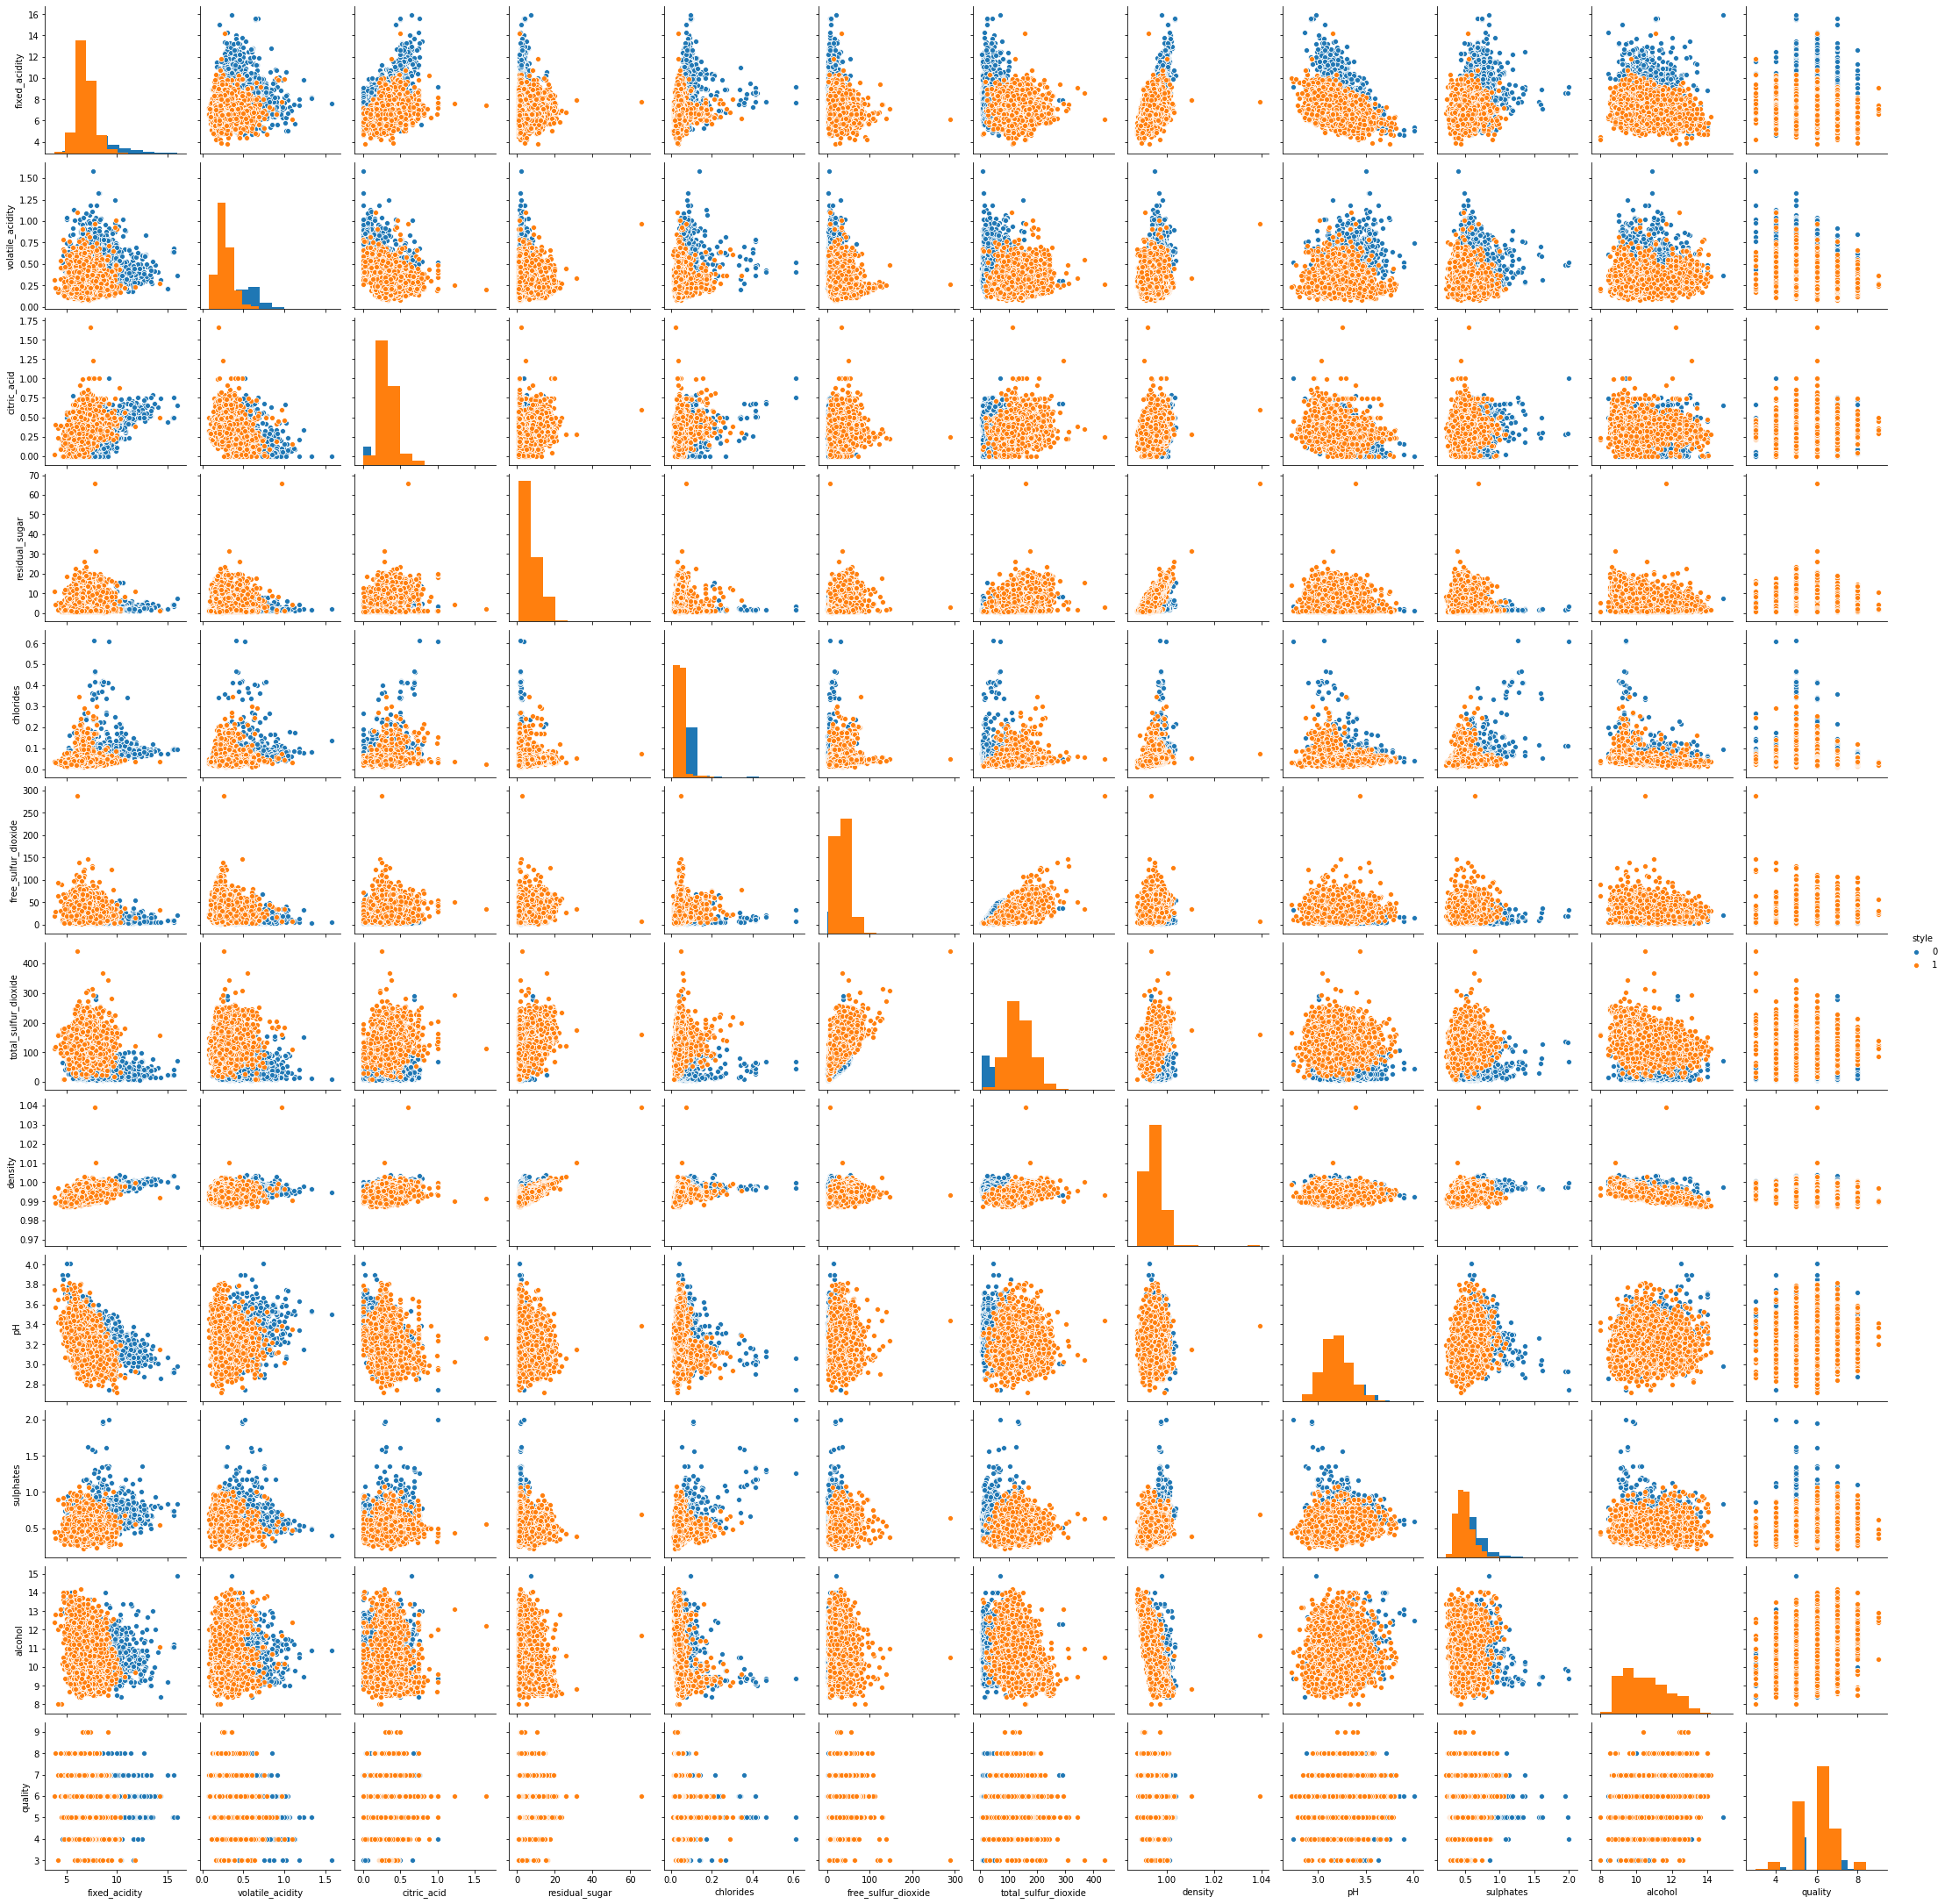

In [11]:
sns.pairplot(arq, hue="style",diag_kind='hist')#função usada para calcular a matriz de dispersão


# Box Plot
* Para verificar se em algum dos atributos ocorre a presença de outlier ou algum atributo possa contribuir mais na determinação do tipo de vinho, é necessário utilizar o boxplot.
* As linhas abaixo foram plotados os atributos quality e fixed_acidity.


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023266068D88>,
      dtype=object)

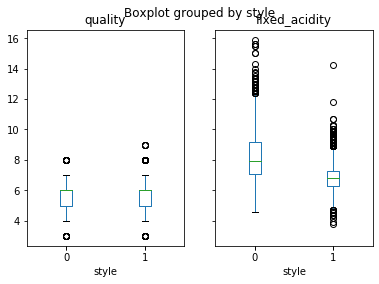

In [10]:
arq.boxplot(by ='style', column = ['quality','fixed_acidity'], grid = False)


# Matriz de Confusão,  Acuracia, Precisão, Revocação e F1-Score
* O modelo de Machine Learning utilizado nesse processo foi o RandomForestClassifier.
* Para a realização do treinamento do modelo foi necessário dividir o dataset em 80% para treino e 20% para teste.
* Para obter os resultados do treinamento e usar o modelo treinado, precisa-se de fato realizar as previsões no dataset a fim de descobrir se o modelo está conseguindo prever de forma correta.
* Foram testadas 1304 amostras de vinho branco e 3894 amostras para vinho tinto.
* Foi utilizada a função metrics.classification_report da biblioteca ‘sklearn’.
* Dessa biblioteca, usamos os critérios de ‘precision’, ‘recall’ e ‘f1-score’ para obter as métricas de avaliação de resultados.
* Também foi obtida a acurácia a partir do treino.
* Por fim, foi utilizado a biblioteca ‘seaborn’ para a apresentação da matriz de confusão, que é responsável por mostrar a quantidade de amostras previstas corretamente ou incorretamente.


Resultados Classificação: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1266
           1       0.99      1.00      0.99      3932

    accuracy                           0.99      5198
   macro avg       0.99      0.98      0.99      5198
weighted avg       0.99      0.99      0.99      5198

Acuracia:  0.9915352058484033


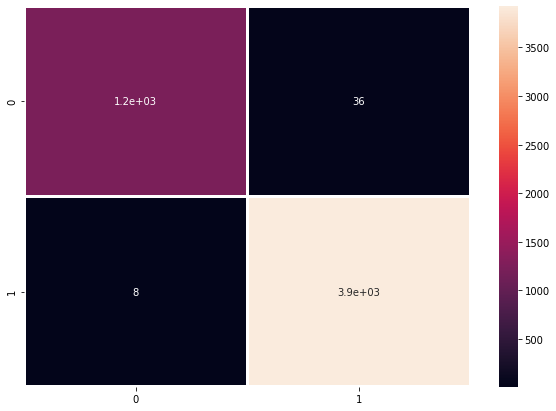

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
#criando os conjuntos de dados de treino e teste:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.8) #porcentagem para treino 80%

modelo = RandomForestClassifier()#Classificador escolhido 
modelo.fit(x_treino, y_treino)
pred_rfc = modelo.predict(x_teste)

matrix = confusion_matrix(y_teste, pred_rfc)
df_cm = pd.DataFrame(matrix, index = [i for i in range(2)],
columns = [i for i in range(2)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, linewidths=2.5) 

print('\nResultados Classificação: \n',classification_report(y_teste,pred_rfc))
cm1= accuracy_score(y_teste,pred_rfc)

print('Acuracia: ',cm1)